# main

I'm attempting yet again to recreate analytical results; this time I use a much higher viscosity. In addition, the engine now makes a better choice of $\tau/\Delta t$ and $\Delta x$ given $\nu \equiv \mu/\rho$.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import copy
import auxiliary as aux

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(4,4))

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'axes.labelsize':20,
})

import os
import re

%reload_ext autoreload
%autoreload 2

In [2]:
# extra stuff
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import math
from scipy.spatial import cKDTree  # For finding nearest neighbors

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

In [3]:
# output directory
src_n = 16
dataDir = f'../data.lbm/{src_n}/'
# dataDir = f'../src/{src_n}/output.lbm/'

# all ticks are found using regular expressions
files = os.listdir(dataDir)
ticks = []

pattern = r'fluidTrj_(\d+)\.csv'

for file in files:
    match = re.search(pattern, file)
    if match:
        ticks.append(int(match.group(1)))
        
ticks.sort()

len(ticks)

102

# Fluid - particle frame

In [4]:
# id += 1
id = -1
fluidDf = pd.read_csv(dataDir + f"fluidTrj_{ticks[id]}.csv").set_index(["id_x","id_y"]).sort_index()

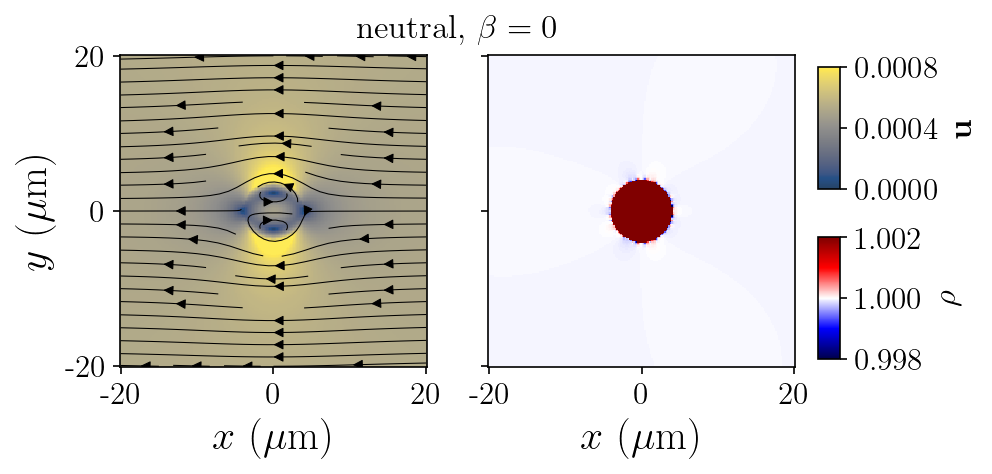

In [5]:
lims = 20
title = "neutral, $\\beta = 0$"
fig, axes = aux.fluidOverview(fluidDf.query(f'coordinate_x**2 <= {lims}**2 & coordinate_y**2 <= {lims}**2'), title)
# plt.savefig("figure1.png", format="png", transparent=True, dpi=1000, bbox_inches="tight")
plt.show()

# Fluid - particle vs lab frame

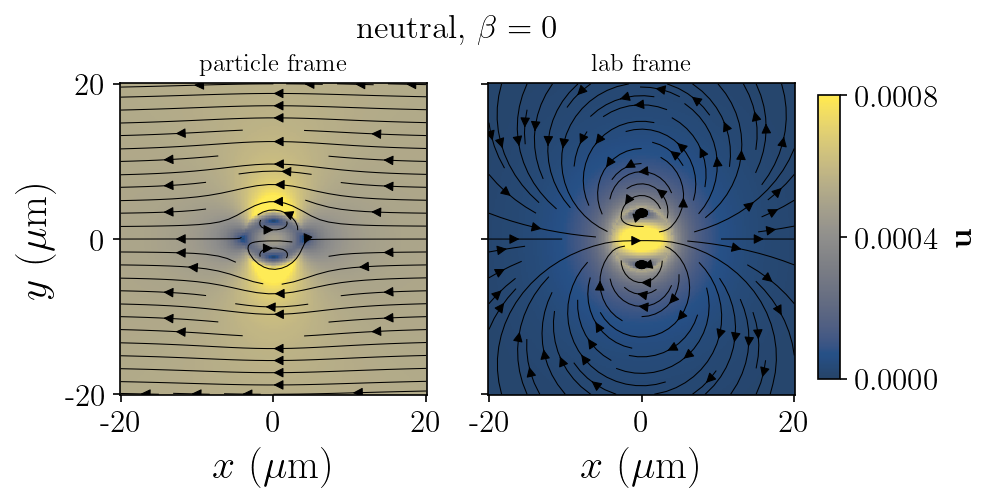

In [6]:
labDf = copy.copy(fluidDf)
flux_x = labDf.query('coordinate_x == -50').fluidVelocity_x.mean()
flux_y = labDf.query('coordinate_x == -50').fluidVelocity_y.mean()
labDf.fluidVelocity_x -= flux_x
labDf.fluidVelocity_y -= flux_y

fig, axes = aux.fluidOverview2(fluidDf.query(f'coordinate_x**2 <= {lims}**2 & coordinate_y**2 <= {lims}**2'), labDf.query(f'coordinate_x**2 <= {lims}**2 & coordinate_y**2 <= {lims}**2'), title)

# Analytical results

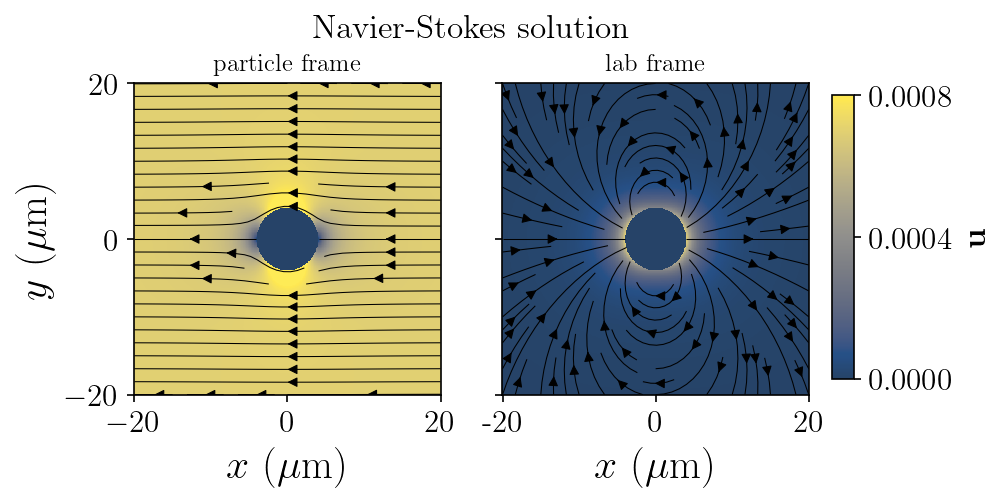

In [7]:
nsDir = '../data.lbm/analyticalResults/'
navierStokesParticleFrameDf = pd.read_csv(nsDir + 'particleFrame/betaZero.csv').set_index(["id_x","id_y"]).sort_index()
navierStokesLabFrameDf = pd.read_csv(nsDir + 'labFrame/betaZero.csv').set_index(["id_x","id_y"]).sort_index()
fig, axes = aux.navierStokesOverview(navierStokesParticleFrameDf, navierStokesLabFrameDf)
# plt.savefig("figure1.png", format="png", transparent=True, dpi=1000, bbox_inches="tight")
plt.show()

# Stability analysis

In [8]:
def avgSpeed(df):
    return np.sqrt(df.fluidVelocity_x**2 + df.fluidVelocity_y**2).mean()

In [9]:
try:
    avgFluidSpeed 
except NameError:
    avgFluidSpeed = []
    
try:
    time 
except NameError:
    time = []

for tick in ticks[len(time)::]:
    auxDf = pd.read_csv(dataDir + f"fluidTrj_{tick}.csv")
    avgFluidSpeed.append(avgSpeed(auxDf))
    time.append(auxDf.time.values[0])
    print(f'\r{tick}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

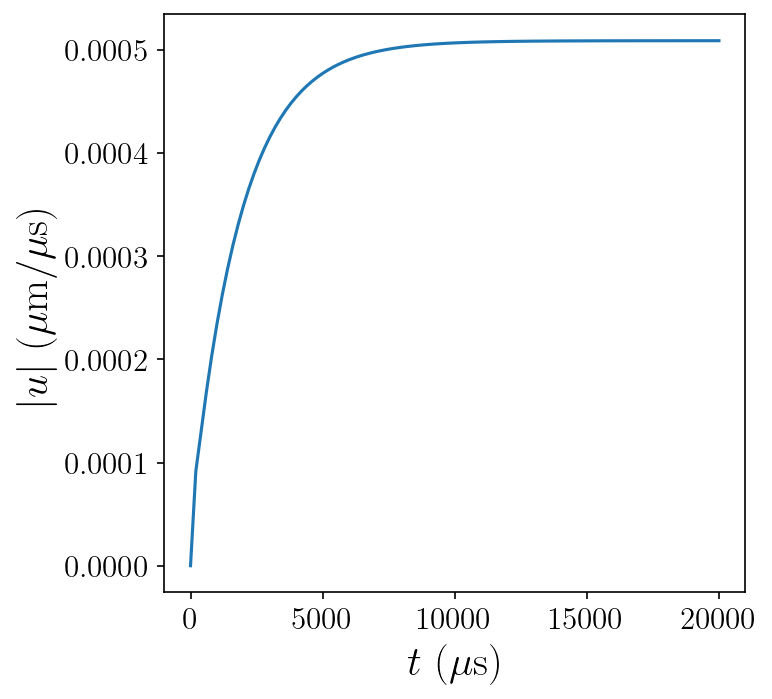

In [10]:
fig, ax = plt.subplots(figsize = (5,5))

ax.plot(time, avgFluidSpeed)
ax.set_xlabel("$t ~ (\\mu \\mathrm{s})$")
ax.set_ylabel("$|u| ~ (\\mu \\mathrm{m} / \\mu \\mathrm{s})$")

plt.show()

# Stress tensor

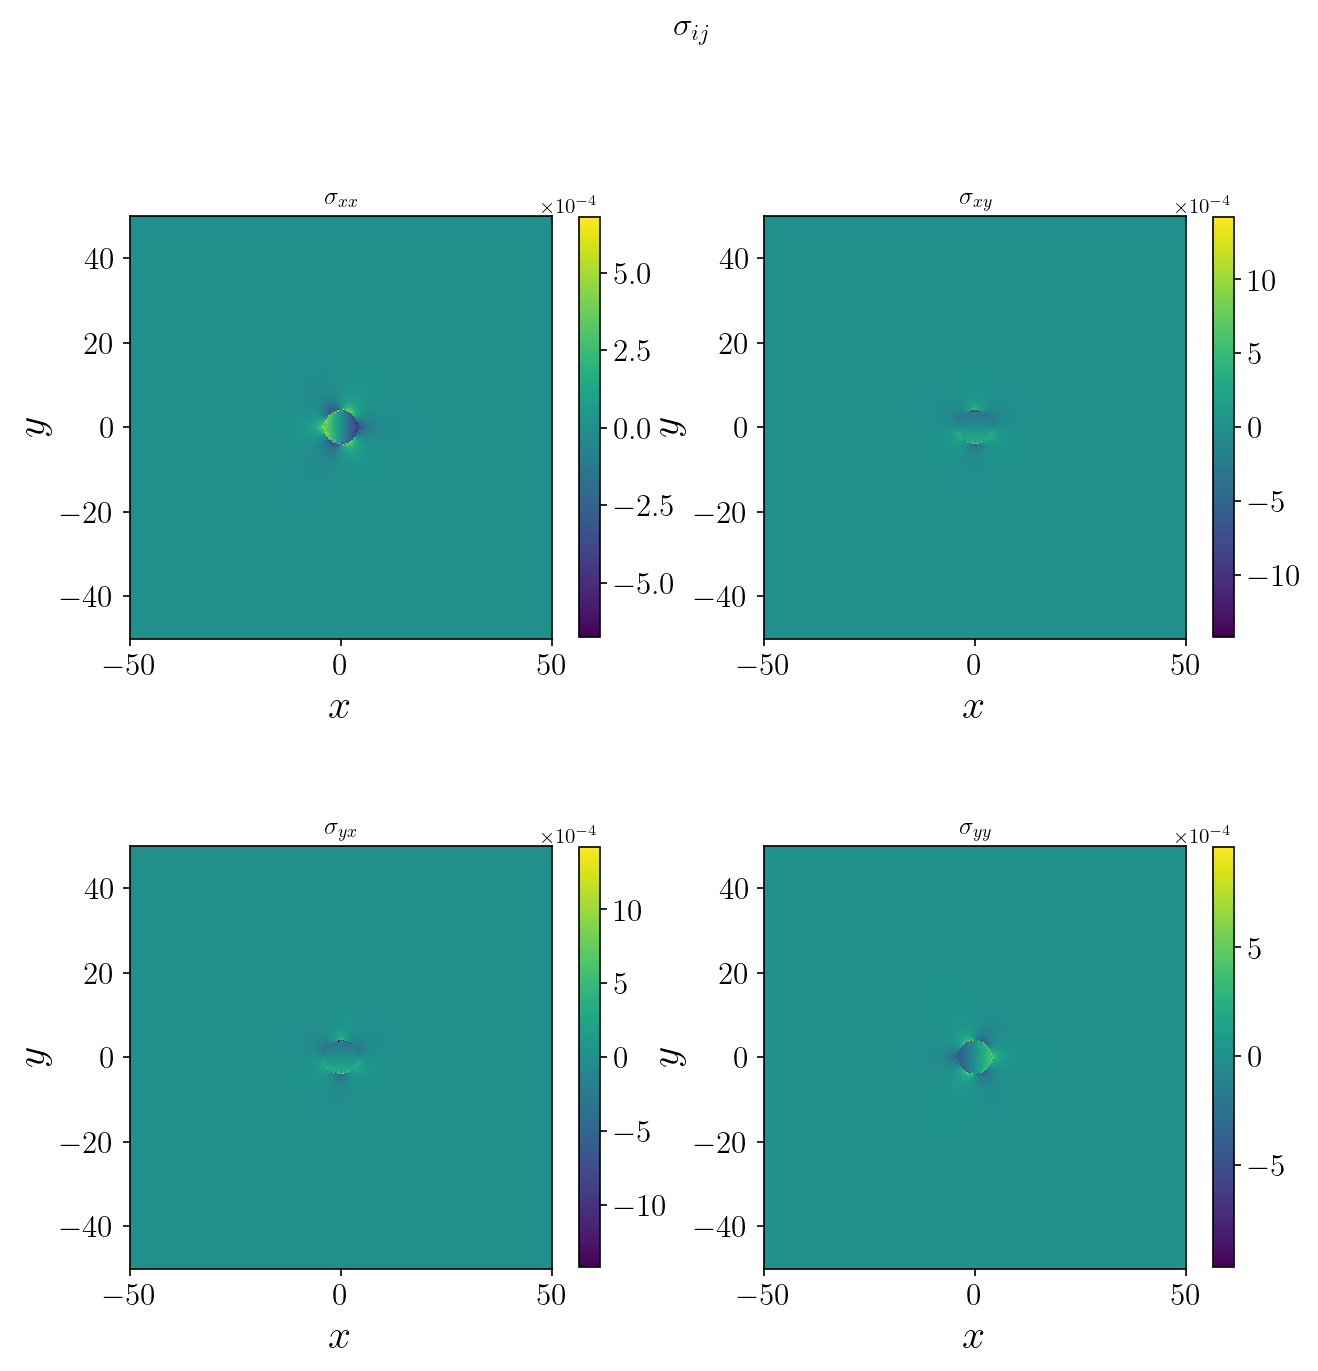

In [11]:
stressDf = pd.read_csv(dataDir + "stressTensor.csv").set_index(["id_x","id_y"]).sort_index()
fig, axes = aux.stressTensorOverview(stressDf)
plt.show()